In [7]:
#Tokenization

import pandas as pd
import numpy as np

#opening the text file using numpy
with open('Random.txt','r') as file:
    content=file.read().lower()

#removing the trailning spaces
content=content.strip("'")

#splitting into sentences in an array

content_split=content.split('.')

all_sent=[]

for i in content_split:
    if i == '': #last word is empty list
        break
    sent=[]
    sent.append(i.strip())
    all_sent.append(sent)

#splitting each sentences into words
all_token=[]
for i in all_sent:
    tokenize=i[0].split(" ")
    all_token.append(tokenize)

#remove 2 letter word
allsent_token=[]
for i in all_token:
    tokenize=[]
    for j in i:
       if len(j)<=2 :
           continue
       else:
           tokenize.append(j)

    allsent_token.append(tokenize)


#finding the frequencies of each word
freq={}

for i in allsent_token:
    for j in i:
        if j in freq:
            freq[j]+=1
        else:
            freq[j]=1


#sorting the frequencies dictionary
sorted_freq = {}
frq_val=[]

for i in freq:
    frq_val.append (freq[i])

frq_val.sort(reverse=True)


for i in frq_val:
    for j in freq:

        if freq[j]==i:
            sorted_freq[j]=freq[j]

#Finding words having frequency more

stop_words=[]

for i in sorted_freq:

    if sorted_freq[i] >21:

        stop_words.append(i)

#Purifying the sentence by removing most frequent word

pure_totsent=[]

for i in allsent_token:
    pure_sent=[]
    for j in i:

        if j not in stop_words:

            pure_sent.append(j)

    pure_totsent.append(pure_sent)

#count no of words in the sentence after removing frequent words

no_words=0

for i in pure_totsent:

    no_words +=len(i)

#freq_pure - frequency after purification of sentence( after removing the frequent words)


freq_pure={}


for i in pure_totsent:
    for j in i:
        if j in freq_pure:
            freq_pure[j]+=1
        else:
            freq_pure[j]=1

#setting index to the tokens
#indices - dictionary of tokens and index
#tokens - array with tokens in the corpus after removing frequent words,2 letter words .

tokens=[]
indices={}
index=0


for i in freq_pure:
    tokens.append(i)
    indices[index]=i
    index+=1

no_of_tokens=index

In [8]:
#one hot encoding
one_hot=np.eye(no_of_tokens)

def softmax(a):
  a=a/np.linalg.norm(a,axis=0,keepdims=True)

  if len(a.shape)>1:
    max_matrix=np.max(a,axis=0) #compare all the rows for each column and takes the bigger value for each column make a single vector
    stable = a-max_matrix
    e=np.exp(stable)
    A= e/np.sum(e,axis=0)
  else : #If there is only one matrix
    max_matrix=np.max(a) #Take the max_value from the single vector
    stable = a-max_matrix
    e=np.exp(stable)
    A= e/np.sum(e)

  return A

In [9]:
np.random.seed(42)

lr=0.001
epoch_avgcost={} #for plotting the graph

total_cost=0
n_dim=50
weight1=np.random.rand(no_of_tokens,n_dim)-.5
weight2=np.random.rand(n_dim,no_of_tokens)-.5

no_of_epochs=800

for epoch in range(no_of_epochs):
  avg_cost=[]
  for center_word in tokens:
    center_word_token_id = tokens.index(center_word)
    one_hot_center=one_hot[center_word_token_id ] #finding onehot of center word
    centerword_embed=np.dot(one_hot_center,weight1) #word embedding(one_hot X weight) to reduce the dimension

    #finding all context with the center word
    all_contexts = []
    for i in pure_totsent:
      if center_word in i:
          all_contexts.append(i)

    all_contexts_len=len(all_contexts)
    context_rnum = np.random.randint(all_contexts_len)
    context=all_contexts[context_rnum]

    center_wordid_in_context=context.index(center_word)


    #selecting the context words according to window size
    window = 3
    context_words=[]
    context_words=context[max(0,(center_wordid_in_context-window)):center_wordid_in_context]+context[center_wordid_in_context+1:center_wordid_in_context+window+1]


    word_check_centerword = np.dot(centerword_embed,weight2) #passing embedded center word throgh weight 2 to convert into original dimension)
    Soft_max=softmax(word_check_centerword)

    total_cost=[]
    cost=0

    for i in context_words:
      cost=(-np.log(Soft_max[tokens.index(i)]))
      total_cost.append(cost)

    avg_cost.append(np.average(total_cost))


    #finding loss
    loss=Soft_max
    for i in context_words:
      loss[tokens.index(i)]-=1


    #finding gradient of loss and weight1 & subtracting from weight2
    dw2=np.dot(loss,weight1)


    weight2.T[center_word_token_id]=weight2.T[center_word_token_id]-dw2*lr

    #finding gradient of loss and weight1 & subtracting from weight2
    dw1=np.dot(loss,weight2.T)

    weight1[center_word_token_id]=weight1[center_word_token_id]-dw1*lr

  

  epoch_avgcost[epoch]=np.average(avg_cost)
  print(epoch,'----------',np.average(avg_cost))


0 ---------- 6.523958310313543
1 ---------- 6.523669742999855
2 ---------- 6.523327727166726
3 ---------- 6.522752698291461
4 ---------- 6.5228904642864425
5 ---------- 6.52220788151517
6 ---------- 6.521505793108811
7 ---------- 6.521018137070714
8 ---------- 6.521082950080965
9 ---------- 6.520717728497008
10 ---------- 6.520552512779158
11 ---------- 6.520041098051029
12 ---------- 6.5198567857718075
13 ---------- 6.519713031325667
14 ---------- 6.518950170969559
15 ---------- 6.518714872434128
16 ---------- 6.517763620189787
17 ---------- 6.5174849084074475
18 ---------- 6.517457707599445
19 ---------- 6.517055519619147
20 ---------- 6.516634845896523
21 ---------- 6.516221547981882
22 ---------- 6.515643152033171
23 ---------- 6.515504547820185
24 ---------- 6.51500341794741
25 ---------- 6.514335569552997
26 ---------- 6.514550279803946
27 ---------- 6.514274342297766
28 ---------- 6.513473817578736
29 ---------- 6.512328705497184
30 ---------- 6.513040917772651
31 ---------- 6.5

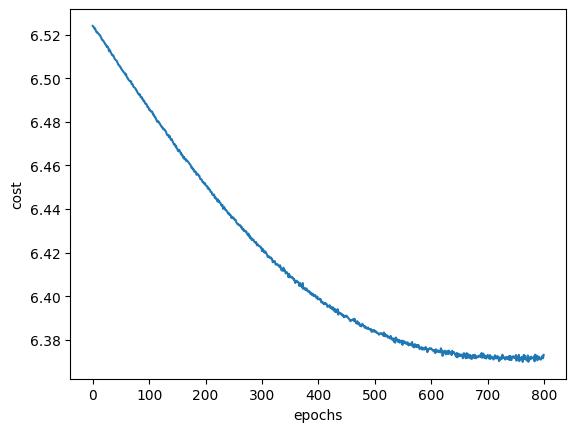

In [16]:
import matplotlib.pyplot as plt
plt.plot(epoch_avgcost.keys(),epoch_avgcost.values(),label="learning rate = {}".format(lr))
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

In [17]:
#loading obtained weight

np.save('we1.npy',weight1)
np.save('we2.npy',weight2)

w1=np.load('we1.npy')
w2=np.load('we2.npy')

In [19]:
#testing with probabilities

index_no=432
word=tokens[index_no]
print("center word : ",word)

word2vec=np.dot(one_hot,w1)
initial_dim=np.dot(word2vec,w2)
prob=softmax(initial_dim[index_no])

max_prob_index=np.argmax(prob) 
print()
print("testing by checking the maximum probabilities")
print("---------------Context Words-----------------")
for i in range(5):
    max_prob_index=np.argmax(prob) 
    if(tokens[max_prob_index]!=word):
       print(tokens[max_prob_index])  
    
    prob[max_prob_index]=0

print(" --------------Context Sentences-------------")
for i in all_token:
   if word in i:
      print(all_sent[all_token.index(i)])


center word :  eucalyptus

testing by checking the maximum probabilities
---------------Context Words-----------------
eat
helps
neck
leaves
 --------------Context Sentences-------------
['koalas live in trees and eat eucalyptus leaves']


In [20]:
#testing with difference in word2vec

index_no=432
word=tokens[index_no]
print("center word : ",word)

diff_word2vec=[]
current_wordembed=word2vec[index_no]
for i in word2vec:
    
    if np.all(i == current_wordembed):
        diff_word2vec.append(1000)
        
    else:
        diff=abs(i-current_wordembed)
        
        diff_word2vec.append(np.sum(diff))



print()
print("testing by finding the difference between 2 word vectors")
print("---------------Context Words-----------------")
for i in range(5):
    min_dist_index=np.argmin(diff_word2vec)
    if(tokens[min_dist_index]!=word):
       print(tokens[min_dist_index])    
    
    diff_word2vec[min_dist_index]=1000

print(" --------------Context Sentences-------------")
for i in all_token:
   if word in i:
      print(all_sent[all_token.index(i)])


center word :  eucalyptus

testing by finding the difference between 2 word vectors
---------------Context Words-----------------
koalas
eat
trees
leaves
live
 --------------Context Sentences-------------
['koalas live in trees and eat eucalyptus leaves']
